In [1]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

data_path = Path().cwd().parent / "data"

2025-11-24 16:00:27.672891: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-24 16:00:27.710045: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-24 16:00:28.608259: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
data = pd.read_csv(data_path / "heart.csv", sep=";")
x = data[["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]]
y = data[["HeartDisease"]]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=123
)

In [3]:
x_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
660,58,140,211,1,165,0.0
426,56,126,166,0,140,0.0
338,63,140,0,1,149,2.0
151,48,100,159,0,100,0.0
542,54,138,274,0,105,1.5
...,...,...,...,...,...,...
98,56,120,85,0,140,0.0
322,38,105,0,1,166,2.8
382,43,115,0,0,145,2.0
365,64,200,0,0,140,1.0


In [4]:
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


In [5]:
# build a model
model = Sequential()
model.add(
    Dense(4, input_shape=(x_train.shape[1],), activation="relu")
)  # Add an input shape! (features,)
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

# compile the model
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

# now we just update our model fit call
history = model.fit(
    x_train,
    y_train,
    epochs=300,  # you can set this to a big number!
    batch_size=10,
    validation_data=(x_test, y_test),
    verbose=1,
)

/home/trappler/code/UP3_sandbox/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-24 16:00:29.660554: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53 (212.00 B)

 Trainable params: 53 (212.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5272 - loss: 6.2268 - val_accuracy: 0.5489 - val_loss: 2.9315
Epoch 2/300
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5313 - loss: 2.8811 - val_accuracy: 0.5707 - val_loss: 1.7680
Epoch 3/300
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5627 - loss: 1.9029 - val_accuracy: 0.5815 - val_loss: 1.3912
Epoch 4/300
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5695 - loss: 1.4946 - val_accuracy: 0.5815 - val_loss: 1.1619
Epoch 5/300
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5872 - loss: 1.2420 - val_accuracy: 0.5707 - val_loss: 1.0280
Epoch 6/300
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5845 - loss: 1.0776 - val_accuracy: 0.5652 - val_loss: 0.9129
Epoch 7/300
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5845 - loss: 0.9437 - val_accuracy: 0.5761 - val_loss: 0.8301
Epoch 8/300
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5899 - loss: 0.8329 - val_accuracy: 0.5707 - v

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)

print("Test loss     :", score[0])
print("Test accuracy :", score[1])

Test loss     : 0.5454638600349426
Test accuracy : 0.7010869383811951


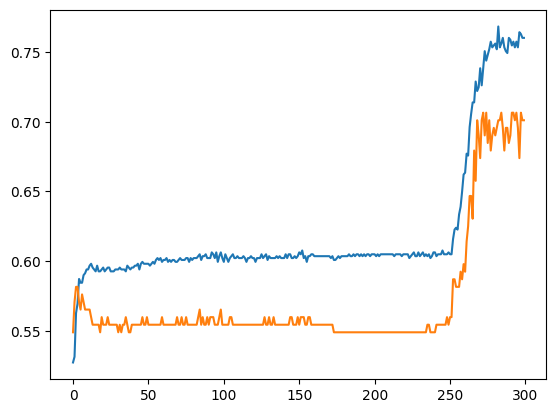

In [7]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

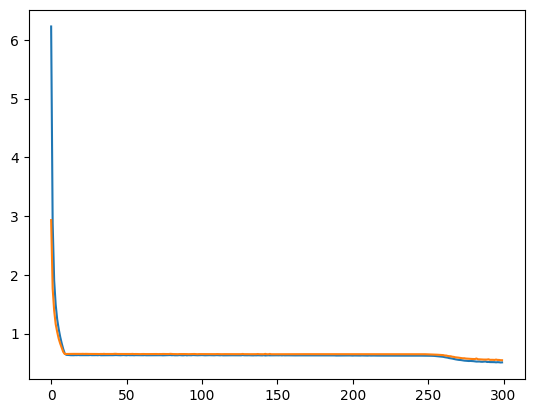

In [8]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [14]:
model.predict(x_test)  # prob of Heart Disease
preds = np.round(model.predict(x_test), 0)  # 1 and 0 (survival or not)
# y_test  # 1 and 0 (Heart Disease or not)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [15]:
print(confusion_matrix(y_test, preds))  # order matters! (actual, predicted)

[[54 27]
 [28 75]]


In [16]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66        81
           1       0.74      0.73      0.73       103

    accuracy                           0.70       184
   macro avg       0.70      0.70      0.70       184
weighted avg       0.70      0.70      0.70       184



In [17]:
conf_matrix = confusion_matrix(y_test, preds)
conf_matrix[0, 0] / (conf_matrix[0, :].sum()), conf_matrix[1, 1] / (
    conf_matrix[1, :].sum()
)

(np.float64(0.6666666666666666), np.float64(0.7281553398058253))

In [13]:
# Accuracy
(60 + 81) / conf_matrix.sum()

np.float64(0.7663043478260869)